In [41]:
%run input/Format.ipynb
import ROOT as root
from array import array
root.gErrorIgnoreLevel = root.kFatal
%jsroot on

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


Welcome to JupyROOT 6.30/06


In [42]:
N_files = 100

In [43]:
N_centr = 5
colors=[1,2,4,root.kGreen+2,root.kMagenta,root.kOrange+4,root.kGray,root.kCyan]
central_bins = [0,20,20,40,40,60,60,80,80,93]
pt_boarders = [0.5,0.9,0.2,0.5,0.5,1.0,1.0,5.0,0.5,5]
file_path="/home/yoren/bnl/PHENIX/ee/data/"
file_names=["my-411601.root"] 
sim_file_path="../sim/output/Newembed/sngl/"
legend_names = ["real","#pi^{0}","#eta","#gamma #rightarrow ee","c#bar{c}","b#bar{b}"] 
hist_select_3D_names = ["myvtx_hist_0","myvtx_hist_1","myvtx_hist_2",'myvtx_hist_3','myvtx_hist_4','el_pt_hist_0','el_pt_hist_5']

In [44]:
N_hists = len(hist_select_3D_names)
loc = True
Save_to_html = False

In [45]:
hists_read, hists_sim = [], []

for iFile in range(len(file_names)):
    print(file_path+file_names[iFile])
    infile = root.TFile.Open(file_path+file_names[iFile], "read")
    hists_read_file = []
    for ihist in range(N_hists):
        hists_read_file.append(infile.Get(hist_select_3D_names[ihist]))
        hists_read_file[-1].SetDirectory(root.nullptr)
        hists_read_file[-1].SetName(hists_read_file[-1].GetName()+f"{iFile}")
    hists_read.append(hists_read_file)


infile.Close()

/home/yoren/bnl/PHENIX/ee/data/my-411601.root


In [46]:

conv_type = [25,25]
pt = [1.45,2.45]
c0 = root.TCanvas(f"c0",f"c0",1550,900)
c0.Divide(3,2)
legends = []
proj_y = hists_read[0][0].ProjectionY(hists_read[0][0].GetName()+f"pos_proj_y",1,-1,1,-1)
biny0 = proj_y.FindBin(-0.02)
biny1 = proj_y.FindBin(0.09)
for icentr in range(N_centr):
    c0.cd(1+icentr)
    type_loc = icentr
    pos_proj = hists_read[0][type_loc].ProjectionX(hists_read[0][type_loc].GetName()+f"pos_proj_{icentr}",biny0,biny1,1,-1)
    Format_Hist_total(pos_proj,title_x="x, cm",offset_y=1.1)
    root.gPad.SetLogy()
    pos_proj.GetXaxis().SetRangeUser(-1800,1000)
    pos_proj.Draw()
    #pos_proj.Fit("gaus","R","")
    legends.append(root.TLegend(0.5,0.6,0.95,0.95,f"{central_bins[2*icentr]}-{central_bins[2*icentr+1]}%, pT={pt[0]}"))
    legends[-1].AddEntry(pos_proj,legend_names[0],"l")
    Format_Legend(legends[-1])
    legends[-1].Draw()
    #print(pos_proj.Integral(pos_proj.FindBin(0.27),pos_proj.FindBin(0.4))/pos_proj.Integral())
    print(f"Mean and Standard deviation for {icentr}: {pos_proj.GetMean()*10000:.0f}, {pos_proj.GetStdDev()*10000:.0f} mum")

if not Save_to_html: c0.Draw()
if not Save_to_html: c0.SaveAs(f"output/rich_emcal_qa/qa_pt_centr_{icentr}.png")

Mean and Standard deviation for 0: 3566, 76 mum
Mean and Standard deviation for 1: 3565, 74 mum
Mean and Standard deviation for 2: 3559, 76 mum
Mean and Standard deviation for 3: 3562, 122 mum
Mean and Standard deviation for 4: 3557, 256 mum


python ERROR: cannot open image file "output/rich_emcal_qa/qa_pt_centr_4.png" for writing. Please check permissions.


In [47]:

conv_type = [25,25]
pt = [1.45,2.45]
c0 = root.TCanvas(f"c0",f"c0",1550,900)
c0.Divide(3,2)
proj_x = hists_read[0][0].ProjectionX(hists_read[0][0].GetName()+f"pos_proj_x",1,-1,1,-1)
biny0 = proj_x.FindBin(0.27)
biny1 = proj_x.FindBin(0.40)
legends = []
for icentr in range(N_centr):
    c0.cd(1+icentr)
    type_loc = icentr
    pos_proj = hists_read[0][type_loc].ProjectionY(hists_read[0][type_loc].GetName()+f"pos_proj_{icentr}",1,-1,1,-1)
    Format_Hist_total(pos_proj,title_x="y, cm",offset_y=1.1)
    root.gPad.SetLogy()
    pos_proj.GetXaxis().SetRangeUser(-1800,1000)
    pos_proj.Draw()
    legends.append(root.TLegend(0.2,0.6,0.65,0.95,f"{central_bins[2*icentr]}-{central_bins[2*icentr+1]}%, pT={pt[0]}"))
    legends[-1].AddEntry(pos_proj,legend_names[0],"l")
    Format_Legend(legends[-1])
    legends[-1].Draw()
    print(pos_proj.Integral(pos_proj.FindBin(-0.02),pos_proj.FindBin(0.09))/pos_proj.Integral())
    print(f"Standard deviation for {icentr}: {pos_proj.GetStdDev()*10000:.0f} mum")

if not Save_to_html: c0.Draw()
if not Save_to_html: c0.SaveAs(f"output/rich_emcal_qa/qa_pt_centr_{icentr}.png")

0.9996030045903463
Standard deviation for 0: 75 mum
0.9998353734218959
Standard deviation for 1: 71 mum
0.9996618494728516
Standard deviation for 2: 79 mum
0.9986344511709878
Standard deviation for 3: 115 mum
0.9849209949587564
Standard deviation for 4: 266 mum


python ERROR: cannot open image file "output/rich_emcal_qa/qa_pt_centr_4.png" for writing. Please check permissions.


In [48]:

conv_type = [25,25]
pt = [1.45,2.45]
c0 = root.TCanvas(f"c0",f"c0",1550,900)
c0.Divide(3,2)
legends = []
for icentr in range(N_centr):
    c0.cd(1+icentr)
    type_loc = icentr
    pos_proj = hists_read[0][type_loc].ProjectionZ(hists_read[0][type_loc].GetName()+f"pos_proj_{icentr}",1,-1,1,-1)
    Format_Hist_total(pos_proj,title_x="z, cm",offset_y=1.1)
    #root.gPad.SetLogy()
    pos_proj.GetXaxis().SetRangeUser(-1800,1000)
    pos_proj.Draw()
    legends.append(root.TLegend(0.2,0.6,0.65,0.95,f"{central_bins[2*icentr]}-{central_bins[2*icentr+1]}%, pT={pt[0]}"))
    legends[-1].AddEntry(pos_proj,legend_names[0],"l")
    Format_Legend(legends[-1])
    legends[-1].Draw()

if not Save_to_html: c0.Draw()
if not Save_to_html: c0.SaveAs(f"output/rich_emcal_qa/qa_pt_centr_{icentr}.png")

python ERROR: cannot open image file "output/rich_emcal_qa/qa_pt_centr_4.png" for writing. Please check permissions.


reading file list

In [49]:
import os
import re

file_pattern = re.compile(r"my-(\d{6})\.root")

file_numbers = []

for filename in os.listdir(file_path):
    match = file_pattern.match(filename)
    if match:
        file_numbers.append(match.group(1))

print(len(file_numbers))

1072


In [50]:
file_numbers.sort()

In [51]:
def vertex_estimator(file_number, N_hists_local = [5]):
    infile = root.TFile.Open(file_path+f"my-{file_number}.root", "read")
    hists_read_file = []
    for ihist in N_hists_local:
        hists_read_file.append(infile.Get(hist_select_3D_names[ihist]))
        hists_read_file[-1].SetDirectory(root.nullptr)
        hists_read_file[-1].SetName(hists_read_file[-1].GetName()+f"{file_number}")
    pos_projX = hists_read_file[0].ProjectionX(hists_read_file[0].GetName()+f"pos_projX_{file_number}",1,-1,1,-1)
    pos_projY = hists_read_file[0].ProjectionY(hists_read_file[0].GetName()+f"pos_projY_{file_number}",1,-1,1,-1)
    if N_hists_local[0]==5:
        return pos_projX.GetMean(), pos_projX.GetStdDev()*10000, pos_projY.GetMean(), pos_projY.GetStdDev()*10000, hists_read_file[0].GetEntries()/(infile.Get(hist_select_3D_names[0]).GetEntries()+1)
    return pos_projX.GetMean(), pos_projX.GetStdDev()*10000, pos_projY.GetMean(), pos_projY.GetStdDev()*10000, hists_read_file[0].GetEntries()/1.e6

In [52]:
meanX, meanY, stddevX, stddevY, entries = [], [], [], [], []
for file_number in file_numbers:
    meanX_local, stddevX_local, meanY_local, stddevY_local, entries_local = vertex_estimator(file_number)
    meanX.append(meanX_local)
    meanY.append(meanY_local)
    stddevX.append(stddevX_local)
    stddevY.append(stddevY_local)
    entries.append(entries_local)

In [53]:
# Create canvases
c1 = root.TCanvas("c1", "Mean X vs File Numbers", 800, 600)
c2 = root.TCanvas("c2", "Mean Y vs File Numbers", 800, 600)
c3 = root.TCanvas("c3", "StdDev X vs File Numbers", 800, 600)
c4 = root.TCanvas("c4", "StdDev Y vs File Numbers", 800, 600)
c5 = root.TCanvas("c5", "Entries vs File Numbers", 800, 600)

# Convert file_numbers to integers for plotting
file_numbers_int = [int(num) for num in file_numbers]

# Create graphs
graph_meanX = root.TGraph(len(file_numbers), array('d', file_numbers_int), array('d', meanX))
graph_meanY = root.TGraph(len(file_numbers), array('d', file_numbers_int), array('d', meanY))
graph_stddevX = root.TGraph(len(file_numbers), array('d', file_numbers_int), array('d', stddevX))
graph_stddevY = root.TGraph(len(file_numbers), array('d', file_numbers_int), array('d', stddevY))
graph_entries = root.TGraph(len(file_numbers), array('d', file_numbers_int), array('d', entries))

# Customize and draw graphs
def customize_and_draw(graph, canvas, title, x_title, y_title):
    canvas.cd()
    graph.SetTitle(title)
    Format_Hist_total(graph, Msize=1, Mcolor=4, Mstyle=20, title_x=x_title, title_y=y_title, left=0.17, offset_y=1.1)
    graph.Draw("AP")
    canvas.Draw()

customize_and_draw(graph_meanX, c1, "Mean X vs File Numbers", "File Numbers", "Mean X, cm")
customize_and_draw(graph_meanY, c2, "Mean Y vs File Numbers", "File Numbers", "Mean Y, cm")
customize_and_draw(graph_stddevX, c3, "StdDev X vs File Numbers", "File Numbers", "StdDev X, #mum")
customize_and_draw(graph_stddevY, c4, "StdDev Y vs File Numbers", "File Numbers", "StdDev Y, #mum")
customize_and_draw(graph_entries, c5, "Entries vs File Numbers", "File Numbers", "Entries#times10^{6}")

In [54]:

# Save canvases as images
c1.SaveAs("output/meanX_vs_file_numbers.png")
c2.SaveAs("output/meanY_vs_file_numbers.png")
c3.SaveAs("output/stddevX_vs_file_numbers.png")
c4.SaveAs("output/stddevY_vs_file_numbers.png")
c5.SaveAs("output/entries_vs_file_numbers.png")

In [55]:
# Calculate weighted averages
def weighted_average(values, weights):
    return sum(v * w for v, w in zip(values, weights)) / sum(weights)

weighted_meanX = weighted_average(meanX, entries)
weighted_meanY = weighted_average(meanY, entries)
weighted_stddevX = weighted_average(stddevX, entries)
weighted_stddevY = weighted_average(stddevY, entries)

print(f"Weighted average of Mean X: {weighted_meanX}")
print(f"Weighted average of Mean Y: {weighted_meanY}")
print(f"Weighted average of StdDev X: {weighted_stddevX}")
print(f"Weighted average of StdDev Y: {weighted_stddevY}")

Weighted average of Mean X: 0.6451548649464004
Weighted average of Mean Y: 1.9978102479229434
Weighted average of StdDev X: 2901.6080993591477
Weighted average of StdDev Y: 14051.670353808706


In [56]:
bad_run_list = []
for local_meanX, run_number in zip(meanX, file_numbers):
    if local_meanX < 0.3:
        bad_run_list.append(run_number)
print(f"Bad runs: {bad_run_list}")

Bad runs: ['405860', '405862']


In [57]:
def format_as_cpp_array(name, data, dtype="float"):
    size = len(data)
    if dtype == "float":
        formatted_data = ", ".join(f"{x:.3e}" for x in data)
    else:
        formatted_data = ", ".join(map(str, data))
    return f"const {dtype} {name}[{size}] = {{{formatted_data}}};"

bad_run_list_cpp = format_as_cpp_array("bad_run_list", bad_run_list, dtype="int")
meanX_cpp = format_as_cpp_array("meanX", meanX)
meanY_cpp = format_as_cpp_array("meanY", meanY)
file_numbers_cpp = format_as_cpp_array("file_numbers", file_numbers, dtype="int")

print(bad_run_list_cpp)
print(meanX_cpp)
print(meanY_cpp)
print(file_numbers_cpp)

const int bad_run_list[2] = {405860, 405862};
const float meanX[1072] = {0.000e+00, 0.000e+00, 6.463e-01, 6.374e-01, 6.555e-01, 6.469e-01, 6.410e-01, 6.462e-01, 6.358e-01, 6.368e-01, 6.443e-01, 6.440e-01, 6.457e-01, 6.359e-01, 6.389e-01, 6.520e-01, 6.402e-01, 6.587e-01, 6.483e-01, 6.424e-01, 6.446e-01, 6.321e-01, 6.469e-01, 6.458e-01, 6.453e-01, 6.470e-01, 6.475e-01, 6.491e-01, 6.366e-01, 6.461e-01, 6.464e-01, 6.441e-01, 6.433e-01, 6.385e-01, 6.373e-01, 6.404e-01, 6.438e-01, 6.601e-01, 6.498e-01, 6.423e-01, 6.423e-01, 6.457e-01, 6.371e-01, 6.388e-01, 6.312e-01, 6.448e-01, 6.442e-01, 6.422e-01, 6.397e-01, 6.460e-01, 6.455e-01, 6.410e-01, 6.451e-01, 6.428e-01, 6.455e-01, 6.472e-01, 6.492e-01, 6.428e-01, 6.334e-01, 6.318e-01, 6.303e-01, 6.419e-01, 6.393e-01, 6.430e-01, 6.388e-01, 6.423e-01, 6.426e-01, 6.387e-01, 6.410e-01, 6.398e-01, 6.394e-01, 6.420e-01, 6.412e-01, 6.455e-01, 6.443e-01, 6.469e-01, 6.411e-01, 6.457e-01, 6.483e-01, 6.437e-01, 6.415e-01, 6.394e-01, 6.331e-01, 6.384e-01, 6.3

In [58]:
cpp_code = """
bool is_bad_run(int run_number) {
    for (int i = 0; i < sizeof(bad_run_list) / sizeof(bad_run_list[0]); ++i) {
        if (bad_run_list[i] == run_number) {
            return true;
        }
    }
    return false;
}

void get_mean_values(int run_number, double &mean_x, double &mean_y) {
    for (int i = 0; i < sizeof(file_numbers) / sizeof(file_numbers[0]); ++i) {
        if (file_numbers[i] == run_number) {
            mean_x = meanX[i];
            mean_y = meanY[i];
            return;
        }
    }
    mean_x = -1;  // Indicate not found
    mean_y = -1;  // Indicate not found
}
"""
print(cpp_code)


bool is_bad_run(int run_number) {
    for (int i = 0; i < sizeof(bad_run_list) / sizeof(bad_run_list[0]); ++i) {
        if (bad_run_list[i] == run_number) {
            return true;
        }
    }
    return false;
}

void get_mean_values(int run_number, double &mean_x, double &mean_y) {
    for (int i = 0; i < sizeof(file_numbers) / sizeof(file_numbers[0]); ++i) {
        if (file_numbers[i] == run_number) {
            mean_x = meanX[i];
            mean_y = meanY[i];
            return;
        }
    }
    mean_x = -1;  // Indicate not found
    mean_y = -1;  // Indicate not found
}



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
LAYER_RADII = [2.5, 5.0]  # VTX Layer 0 and 1 in cm
SDPHI = 0.02
SDTHE = 0.05

In [2]:
def generate_tracks(ntracks=500, vertex=(0.35, 0.04, 0.0), sigma=0.01):
    x_vtx = np.random.normal(vertex[0], sigma)
    y_vtx = np.random.normal(vertex[1], sigma)
    z_vtx = vertex[2]  # No smearing in Z for now

    hits_layer0 = []
    hits_layer1 = []

    for _ in range(ntracks):
        # pT ~ exponential from 0.1 to 3.0 GeV
        pt = min(np.random.exponential(scale=0.5) + 0.1, 3.0)
        R = 300.0 * pt  # cm, assuming qB = 0.9 T

        # rapidity flat in [-0.5, 0.5] → get theta
        eta = np.random.uniform(-0.5, 0.5)
        theta = 2 * np.arctan(np.exp(-eta))  # radians

        phi0 = np.random.uniform(0, 2 * np.pi)
        
        charge = np.random.choice([-1, 1])  # random charge

        hit_coords = []
        for radius in LAYER_RADII:
            dphi = radius / R
            phi = phi0 + charge * dphi
            x = x_vtx + radius * np.cos(phi)
            y = y_vtx + radius * np.sin(phi)
            z = z_vtx + radius / np.tan(theta)
            hit_coords.append((x, y, z, phi, theta))

        hits_layer0.append(hit_coords[0])
        hits_layer1.append(hit_coords[1])

    return hits_layer0, hits_layer1, (x_vtx, y_vtx, z_vtx)


In [3]:
def reco_vertex(hits_layer0, hits_layer1, sdphi=SDPHI, sdthe=SDTHE):
    lines_xy = []
    lines_rz = []
    beam_x, beam_y = 0.35, 0.04

    for h0 in hits_layer0:
        for h1 in hits_layer1:
            x0, y0, z0, *_ = h0
            x1, y1, z1, *_ = h1

            r0 = np.sqrt((x0 - beam_x)**2 + (y0 - beam_y)**2)
            r1 = np.sqrt((x1 - beam_x)**2 + (y1 - beam_y)**2)
            phi0 = np.arctan2(y0 - beam_y, x0 - beam_x)
            phi1 = np.arctan2(y1 - beam_y, x1 - beam_x)

            the0 = np.arctan2(r0, z0)  # assuming z is downstream
            the1 = np.arctan2(r1, z1)

            dphi = abs(phi0 - phi1)
            dtheta = abs(the0 - the1)

            if dphi < sdphi and dtheta < sdthe:
                # --- x-y plane ---
                dx = x0 - x1
                dy = y0 - y1
                if abs(dx) > 1e-6:
                    a_xy = dy / dx
                    b_xy = y0 - a_xy * x0
                    lines_xy.append((a_xy, b_xy))

                # --- r-z plane ---
                r0 = np.sqrt(x0**2 + y0**2)
                r1 = np.sqrt(x1**2 + y1**2)
                dr = r0 - r1
                dz = z0 - z1
                if abs(dr) > 1e-6:
                    a_rz = dz / dr
                    b_rz = z0 - a_rz * r0
                    lines_rz.append((a_rz, b_rz))

    def compute_intersections(lines):
        points = []
        weights = []
        for i in range(len(lines)):
            for j in range(i + 1, len(lines)):
                a1, b1 = lines[i]
                a2, b2 = lines[j]
                delta = a1 - a2
                if abs(delta) < 1e-6:
                    continue
                x = (b2 - b1) / delta
                y = a1 * x + b1
                w = 1.0 / (1.0 + delta**2)  # stable weighting
                points.append((x, y))
                weights.append(w)
        return points, weights

    def avg(points):
        if not points:
            return 0.0, 0.0
        x = np.mean([p[0] for p in points])
        y = np.mean([p[1] for p in points])
        return x, y

    def weighted_avg(points, weights):
        if not points:
            return 0.0, 0.0
        total_w = sum(weights)
        x = sum(x * w for (x, _), w in zip(points, weights)) / total_w
        y = sum(y * w for (_, y), w in zip(points, weights)) / total_w
        return x, y

    # Compute
    points_xy, weights_xy = compute_intersections(lines_xy)
    points_rz, weights_rz = compute_intersections(lines_rz)

    xy_unw = avg(points_xy)
    xy_wgt = weighted_avg(points_xy, weights_xy)
    rz_unw = avg(points_rz)
    rz_wgt = weighted_avg(points_rz, weights_rz)

    return {
        "xy_unw": xy_unw,
        "xy_wgt": xy_wgt,
        "rz_unw": rz_unw,
        "rz_wgt": rz_wgt,
        "pts_xy": points_xy,
        "weights_xy": weights_xy,
        "pts_rz": points_rz,
        "weights_rz": weights_rz
    }



In [4]:
def plot_intersection_histograms(vtx_result, true_vtx_x, label="X-coordinate"):
    # Extract X-values of intersections and filter them
    x_unweighted = [x for x, _ in vtx_result['pts_xy'] if -0.5 <= x <= 1]  # Filter for range [-0.5, 1]
    x_weighted = [x for (x, _), w in zip(vtx_result['pts_xy'], vtx_result['weights_xy']) if w > 0 and -0.5 <= x <= 1]

    # Compute mean and median
    def stats(arr):
        return np.mean(arr), np.median(arr)

    mean_unw, median_unw = stats(x_unweighted)
    mean_wgt, median_wgt = stats(x_weighted)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

    # Top: unweighted
    ax1.hist(x_unweighted, bins=500, alpha=0.6, color='gray')
    ax1.axvline(mean_unw, color='green', linestyle='--', label='Mean')
    ax1.axvline(median_unw, color='blue', linestyle=':', label='Median')
    ax1.axvline(true_vtx_x, color='black', linestyle='-', label='True')
    ax1.set_title(f"Unweighted Intersections ({label})")
    ax1.legend()
    ax1.grid(True)

    # Bottom: weighted
    ax2.hist(x_weighted, bins=500, alpha=0.6, color='gray')
    ax2.axvline(mean_wgt, color='green', linestyle='--', label='Mean')
    ax2.axvline(median_wgt, color='blue', linestyle=':', label='Median')
    ax2.axvline(true_vtx_x, color='black', linestyle='-', label='True')
    ax2.set_title(f"Weighted Intersections ({label})")
    ax2.set_xlabel(label)
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

True Vertex:      x=0.3536, y=0.0330, z=0.0000
Reco XY (unw):    x=0.3469, y=0.0080
Reco XY (wgt):    x=0.3313, y=-0.0628
Reco Z  (unw):    z=0.0835
Reco Z  (wgt):    z=0.0954


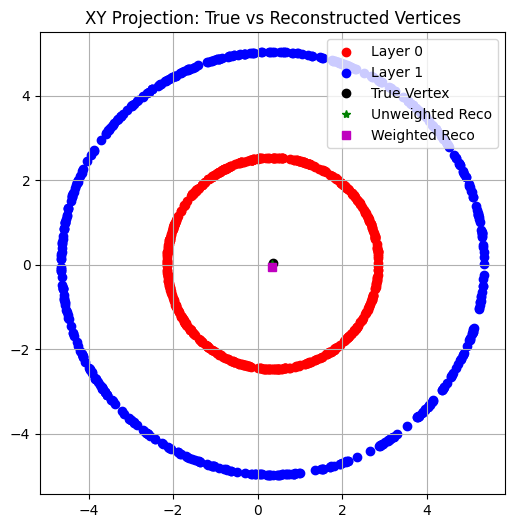

In [5]:
hits0, hits1, true_vtx = generate_tracks()
vtx_result = reco_vertex(hits0, hits1)

print(f"True Vertex:      x={true_vtx[0]:.4f}, y={true_vtx[1]:.4f}, z={true_vtx[2]:.4f}")
print(f"Reco XY (unw):    x={vtx_result['xy_unw'][0]:.4f}, y={vtx_result['xy_unw'][1]:.4f}")
print(f"Reco XY (wgt):    x={vtx_result['xy_wgt'][0]:.4f}, y={vtx_result['xy_wgt'][1]:.4f}")
print(f"Reco Z  (unw):    z={vtx_result['rz_unw'][1]:.4f}")
print(f"Reco Z  (wgt):    z={vtx_result['rz_wgt'][1]:.4f}")

# Plot XY
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*[(x, y) for (x, y, _, _, _) in hits0]), color='red', label='Layer 0')
plt.scatter(*zip(*[(x, y) for (x, y, _, _, _) in hits1]), color='blue', label='Layer 1')
plt.plot(*true_vtx[:2], 'ko', label='True Vertex')
plt.plot(*vtx_result['xy_unw'], 'g*', label='Unweighted Reco')
plt.plot(*vtx_result['xy_wgt'], 'ms', label='Weighted Reco')
plt.axis('equal')
plt.grid(True)
plt.legend(loc='upper right')
plt.title("XY Projection: True vs Reconstructed Vertices")
plt.show()


In [6]:
#%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plot

def plot_3d_hits(hits_layer0, hits_layer1, true_vtx=None, reco_vtx=None):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Extract coordinates
    x0, y0, z0 = zip(*[(x, y, z) for (x, y, z, _, _) in hits_layer0])
    x1, y1, z1 = zip(*[(x, y, z) for (x, y, z, _, _) in hits_layer1])

    ax.scatter(x0, y0, z0, c='r', label='Layer 0', depthshade=True)
    ax.scatter(x1, y1, z1, c='b', label='Layer 1', depthshade=True)

    # True vertex
    if true_vtx:
        ax.scatter(*true_vtx, c='k', marker='o', s=50, label='True Vertex')

    # Reco vertex
    if reco_vtx:
        ax.scatter(*reco_vtx, c='m', marker='^', s=50, label='Reco Vertex')

    ax.set_xlabel('X [cm]')
    ax.set_ylabel('Y [cm]')
    ax.set_zlabel('Z [cm]')
    ax.set_title("3D VTX Hit Map")
    ax.legend()
    plt.tight_layout()
    plt.show()


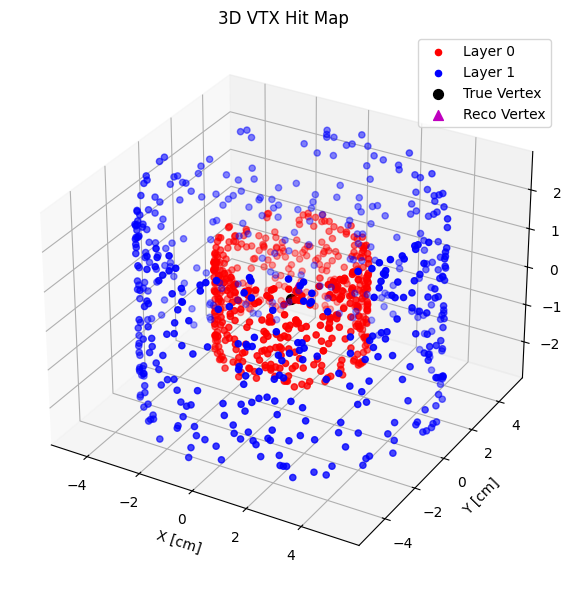

In [7]:
hits0, hits1, true_vtx = generate_tracks()
vtx_result = reco_vertex(hits0, hits1)
reco3d = (vtx_result['xy_unw'][0], vtx_result['xy_unw'][1], vtx_result['rz_unw'][1])

plot_3d_hits(hits0, hits1, true_vtx=true_vtx, reco_vtx=reco3d)


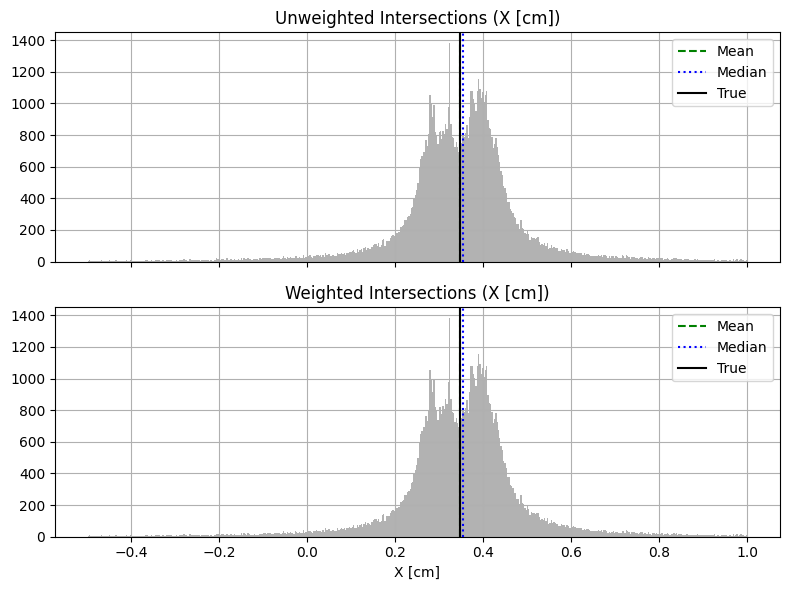

In [8]:
hits0, hits1, true_vtx = generate_tracks()
vtx_result = reco_vertex(hits0, hits1)

plot_intersection_histograms(vtx_result, true_vtx_x=true_vtx[0], label="X [cm]")

